In [28]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [29]:
# loading the dataset
df=pd.read_csv('housing.csv')

In [30]:
# dataset shape
df.shape

(20640, 10)

In [31]:
# displaying the first 5 rows of the dataset
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [32]:
# summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


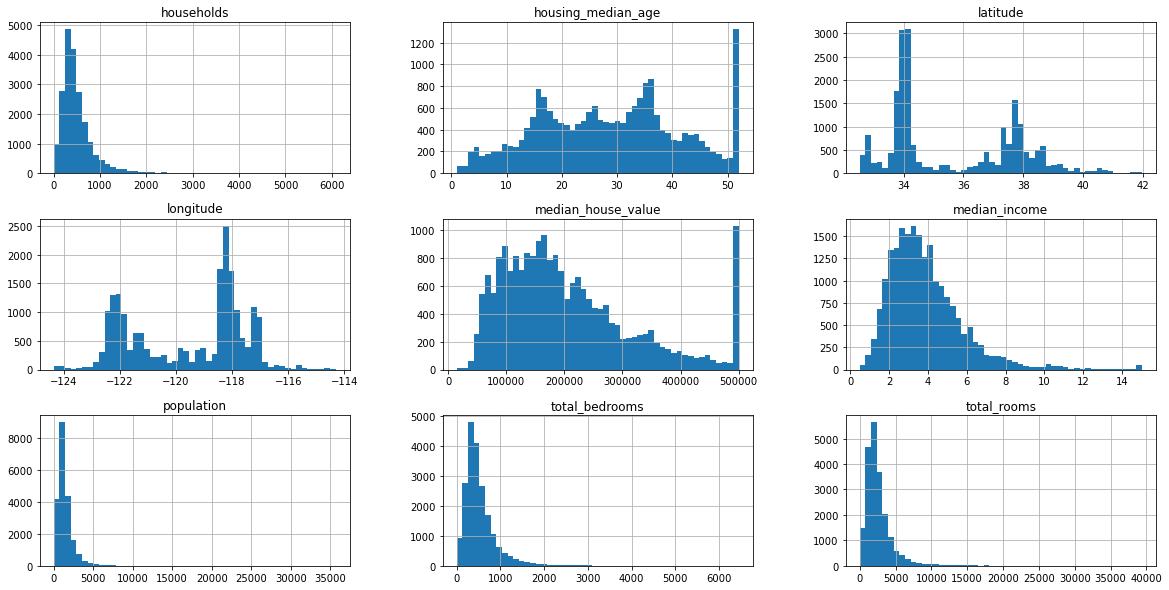

In [33]:
# y-axis gives the count and x-axis the distribution of features
# Histograms of all the numerical features
df.hist(bins=50, figsize=(20,10))
plt.show()

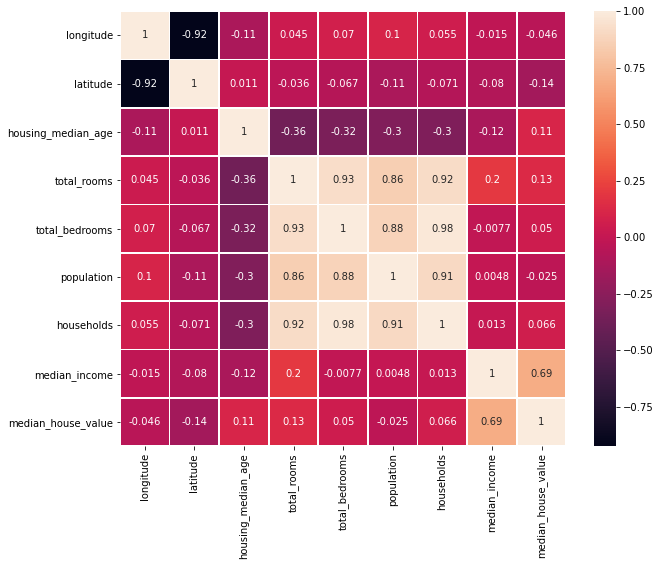

In [34]:
# Plotting of heatmap to observe correlation
fig, ax = plt.subplots(figsize=(10,8))  
sns.heatmap(df.corr(),annot=True, linewidths=.8, ax=ax)

In [35]:
# Correlation values of all features with respect to target variable
corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Text(0.5, 1.0, 'Distribution of households')

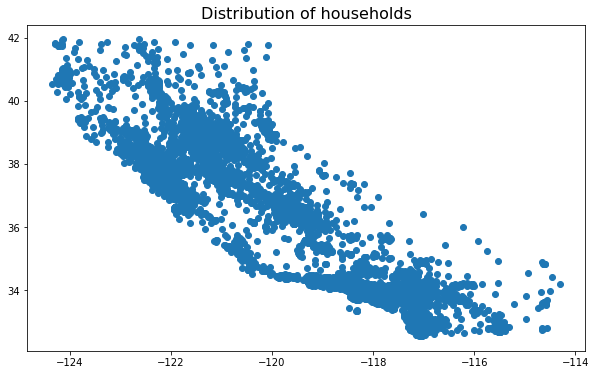

In [36]:
# Scatter plot of longitude and latitude
plt.figure(figsize=(10,6))
plt.scatter(x=df['longitude'],y=df['latitude'])
plt.title("Distribution of households",size=16)

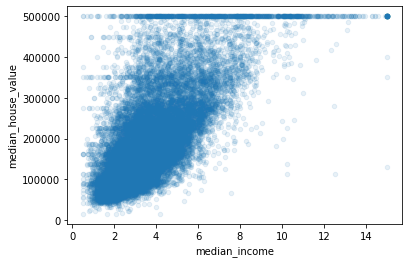

In [37]:
df.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [38]:
# Creating new features
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"] = df["population"]/df["households"]
df["rooms_per_household"] = df["total_rooms"]/df["households"]

In [39]:
corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [40]:
# to check if there are any null values present
print(df.isnull().values.any())

#to get a count of all the null values present in respective columns
print(df.isnull().sum())

True
longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
bedrooms_per_room           207
population_per_household      0
rooms_per_household           0
dtype: int64


In [41]:
# to replace null values with median 
df.fillna(df.median(), inplace=True)

In [42]:
# to convert the categorical values to dummy variables
status = pd.get_dummies(df['ocean_proximity'])
status

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [43]:
# to drop the first column to avoid redundant features
status = pd.get_dummies(df['ocean_proximity'], drop_first = True)
status.head()

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [44]:
df = pd.DataFrame(pd.concat([df, status], axis = 1))
df.drop(['ocean_proximity'], axis = 1, inplace = True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_room,population_per_household,rooms_per_household,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.146591,2.555556,6.984127,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.155797,2.109842,6.238137,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.129516,2.802260,8.288136,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.184458,2.547945,5.817352,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.172096,2.181467,6.281853,0,0,1,0


In [45]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_room,population_per_household,rooms_per_household,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909,0.212940,3.070655,5.429000,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874,0.057700,10.386050,2.474173,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.100000,0.692308,0.846154,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,0.175708,2.429741,4.440716,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.203162,2.818116,5.229129,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,0.239273,3.282261,6.052381,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1243.333333,141.909091,1.000000,1.000000,1.000000,1.000000


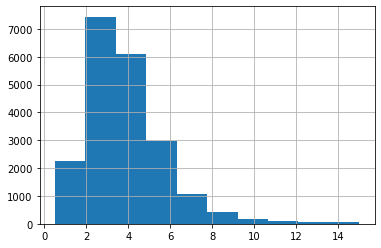

In [46]:
df['median_income'].hist()

In [47]:
# Categorising the median_income feature into 5 categories
df["income_cat"] = np.ceil(df["median_income"]/ 1.5)
print("Placing into categories: \n",df["income_cat"].head())

# median_income > 5 are placed into 5th category
df["income_cat"].where(df["income_cat"] < 5, 5.0, inplace=True)
print("Placing all categories above 5 to 5th category: \n",df["income_cat"].head())

Placing into categories: 
 0    6.0
1    6.0
2    5.0
3    4.0
4    3.0
Name: income_cat, dtype: float64
Placing all categories above 5 to 5th category: 
 0    5.0
1    5.0
2    5.0
3    4.0
4    3.0
Name: income_cat, dtype: float64


In [48]:
# Performing a stratified split
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=29)

for train_index, test_index in sss.split(df, df['income_cat']):
    x_train = df.loc[train_index]
    x_test = df.loc[test_index]

In [49]:
df["income_cat"].value_counts()/ len(df)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [50]:
# to verify stratified shuffle split
print(x_train['income_cat'].value_counts()/ len(x_train))
print(x_test['income_cat'].value_counts()/ len(x_test))

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64
3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64


In [51]:
# dropping the income_cat feature from the dataset
for columns in (x_train, x_test, df):
    columns.drop("income_cat", axis=1, inplace=True)

In [52]:
# Extracting target variable from train and test dataset
y_train=x_train['median_house_value']
y_test=x_test['median_house_value']


x_train = x_train.drop('median_house_value', axis=1)
x_test= x_test.drop('median_house_value', axis=1)

y_train=np.array(y_train)
y_train=y_train[:,np.newaxis]
print(y_train.shape) 
print(x_train.shape)

(16512, 1)
(16512, 15)


In [55]:
# Standardization 
columns=['longitude','latitude','housing_median_age','total_rooms', 'total_bedrooms','population','households',
         'median_income','bedrooms_per_room','population_per_household','rooms_per_household']

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train[columns] = scaler.fit_transform(x_train[columns])
x_test[columns] = scaler.transform(x_test[columns])

In [56]:
print(x_train.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
7771    0.740493 -0.804028            0.506161    -0.289293       -0.274854   
9352   -1.493918  1.081436            1.862351     0.384975       -0.157949   
18657  -1.189679  0.619404           -0.451150     0.783825        1.192418   
4873    0.645730 -0.757358            1.862351    -1.078241       -1.028769   
12350   1.533509 -0.855365           -0.211823     1.109905        1.657650   

       population  households  median_income  bedrooms_per_room  \
7771     0.063785   -0.180190      -0.069372          -0.047308   
9352     0.026861   -0.067678       2.791087          -1.335926   
18657    0.374128    0.989407      -0.416403           0.452344   
4873    -0.833836   -1.048884      -1.015381           2.647667   
12350    1.466044    1.795304      -0.698924           0.540325   

       population_per_household  rooms_per_household  INLAND  ISLAND  \
7771                   0.032731            -0.3077

## Building models

## 1. Linear regression

In [57]:
# training linear model
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [58]:
# linear model coefficients/weights
reg.coef_

array([[-55090.26741658, -55526.11210336,  13364.57944498,
          4960.97739673,   3857.08830425, -44928.14778643,
         40807.61424864,  77742.42988827,  15796.25652394,
           827.5487075 ,   7553.84034066, -35712.90259428,
        148544.53577666,  -4925.92402847,   3818.60148773]])

In [59]:
# Predicted values of training set
y_pred = reg.predict(x_train)
y_pred=pd.DataFrame(y_pred)

print(y_pred.head())

               0
0  207293.102383
1  458974.928870
2  252045.116394
3  190040.814680
4  112219.751797


In [60]:
# MSE AND RMSE of traning
from sklearn import metrics

reg_mse=metrics.mean_squared_error(y_train, y_pred)
print("Regression MSE: ", reg_mse)

reg_rmse=np.sqrt(reg_mse)
print("Regression RMSE:", reg_rmse)

Regression MSE:  4557856768.51801
Regression RMSE: 67511.90093989363


## 2. DecisionTreeRegressor

In [61]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [63]:
# predict on train set
y_pred = tree_reg.predict(x_train)
y_pred=pd.DataFrame(y_pred)

print(y_pred.head())

          0
0  166200.0
1  500001.0
2  263800.0
3   38800.0
4   94800.0


In [64]:
# MSE AND RMSE
from sklearn import metrics

tree_mse=metrics.mean_squared_error(y_train, y_pred)
print("Tree MSE: ",tree_mse)

tree_rmse=np.sqrt(tree_mse)
print("Tree RMSE:", tree_rmse)

Tree MSE:  0.0
Tree RMSE: 0.0


## 3. RandomForestRegressor

In [66]:
# Perform Random Forest Regression on training data
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42)
y_train=y_train.ravel()
rf_reg.fit(x_train, y_train)

# Predict output for train dataset using the fitted model
y_pred = rf_reg.predict(x_train)
y_pred=pd.DataFrame(y_pred)


from sklearn import metrics
rf_mse = metrics.mean_squared_error(y_train, y_pred)
print("RF MSE: ",rf_mse)

rf_rmse=np.sqrt(rf_mse)
print("RF RMSE:", rf_rmse)

RF MSE:  333321445.0383872
RF RMSE: 18257.093006236977


## Cross validation

In [67]:
# cross validation on linear regression model
from sklearn.model_selection import cross_val_score

reg_scores =cross_val_score(reg, x_train , y_train, cv=10, scoring="neg_root_mean_squared_error")

print("CROSS VAL: ", reg_scores)
print("CROSS VAL RMSE : ",abs(reg_scores.mean()))

CROSS VAL:  [-67083.95671573 -69393.846897   -65286.11233071 -67296.54173473
 -66910.98278932 -66666.57137776 -66477.73251179 -67640.44345168
 -66316.68054352 -74707.89461012]
CROSS VAL RMSE :  67778.07629623557


In [68]:
# cross validation on decision tree model
from sklearn.model_selection import cross_val_score

tree_scores=cross_val_score(tree_reg, x_train , y_train, cv=10, scoring="neg_root_mean_squared_error")

print("CROSS VAL: ",tree_scores)
print("CROSS VAL RMSE : ",abs(tree_scores.mean()))

CROSS VAL:  [-67601.84536691 -69425.56390155 -68153.80487815 -69893.4953118
 -66614.99953258 -69575.6414062  -72230.19962689 -68363.39277531
 -65740.83551206 -68449.40508063]
CROSS VAL RMSE :  68604.91833920716


In [69]:
# cross validation on random forest model
from sklearn.model_selection import cross_val_score

rf_scores=cross_val_score(rf_reg, x_train , y_train, cv=10, scoring="neg_root_mean_squared_error")

print("CROSS VAL: ",rf_scores)
print("CROSS VAL RMSE : ",abs(rf_scores.mean()))

CROSS VAL:  [-49213.23674058 -48956.22943985 -47531.51505207 -49129.45018071
 -49173.02905901 -49813.57129668 -48332.78519829 -49102.33032197
 -47353.77532338 -52818.72468747]
CROSS VAL RMSE :  49142.46473000102


## Fine tuning with hyperparameters 

In [70]:
# Fine tunng on random forest model
from sklearn.model_selection import GridSearchCV
param_grid = [
   {'n_estimators': [3, 10, 30,100], 'max_features': [2, 3, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]

In [71]:
rf_reg = RandomForestRegressor()

grid_search = GridSearchCV(rf_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 3, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 100]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [72]:
# to get the best combination of hyperparameters
grid_search.best_params_

{'max_features': 8, 'n_estimators': 100}

In [73]:
# to get the best estimators directly
grid_search.best_estimator_

RandomForestRegressor(max_features=8)

In [74]:
cv_res = grid_search.cv_results_

for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(np.sqrt(-mean_score), params)

62787.32387378333 {'max_features': 2, 'n_estimators': 3}
54579.59525111936 {'max_features': 2, 'n_estimators': 10}
51919.06204170951 {'max_features': 2, 'n_estimators': 30}
51040.4351287278 {'max_features': 2, 'n_estimators': 100}
61688.62719693623 {'max_features': 3, 'n_estimators': 3}
52967.15862078841 {'max_features': 3, 'n_estimators': 10}
50267.0827121132 {'max_features': 3, 'n_estimators': 30}
49458.37306630804 {'max_features': 3, 'n_estimators': 100}
58927.21701046567 {'max_features': 4, 'n_estimators': 3}
52258.56426075115 {'max_features': 4, 'n_estimators': 10}
49466.05466359801 {'max_features': 4, 'n_estimators': 30}
48938.09807069312 {'max_features': 4, 'n_estimators': 100}
58098.214064936634 {'max_features': 6, 'n_estimators': 3}
51407.62629800352 {'max_features': 6, 'n_estimators': 10}
49439.34100485695 {'max_features': 6, 'n_estimators': 30}
48670.70785911942 {'max_features': 6, 'n_estimators': 100}
58002.42689537096 {'max_features': 8, 'n_estimators': 3}
51345.2167941023

In [75]:
final_model = grid_search.best_estimator_
print(final_model)

final_model.fit(x_train, y_train)

final_pred = final_model.predict(x_test)

# Print root mean squared error from Random Forest Regression
from sklearn import metrics


final_mse = metrics.mean_squared_error(y_test, final_pred)
final_rmse = np.sqrt(final_mse)
print("Final RMSE: ",final_rmse)

accuracy=metrics.r2_score(y_test,final_pred)
print("Accuracy:",accuracy*100)

RandomForestRegressor(max_features=8)
Final RMSE:  50114.478354874365
Accuracy: 81.52662040416301
